In [24]:
import numpy as np
from skimage import data, exposure,filters, io
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage import color

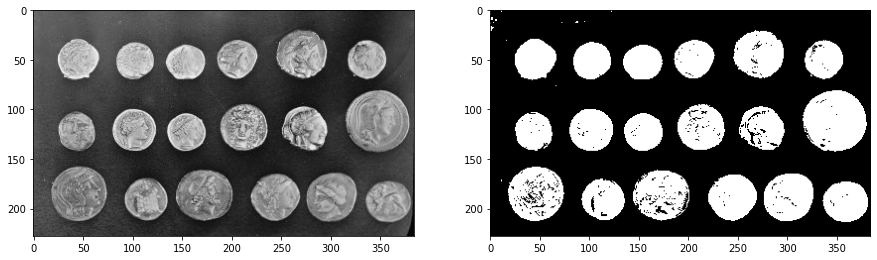

In [6]:
I = data.coins()
I = I[75:,:]
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.subplot(122)
seg_I = I > 105
plt.imshow(seg_I,cmap='gray')

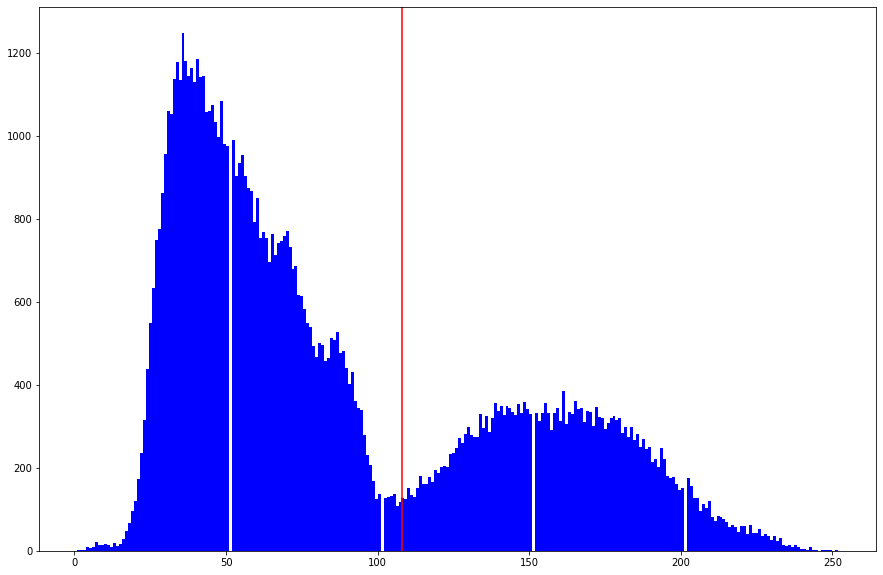

In [9]:
plt.figure(figsize=(15, 10))
ax1  = plt.subplot(111)
plt.hist(I.ravel(), bins=256, histtype='bar', color='blue')
ax1.axvline(108, color='r')

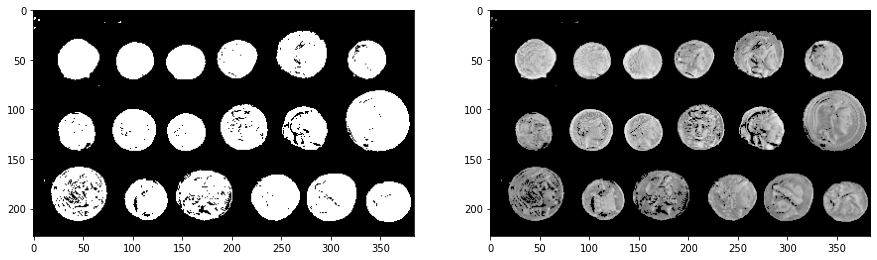

In [12]:
mean_object_intensity = np.mean(I[seg_I])
mean_background_intensity = np.mean(I[seg_I==0])

threshold = (mean_object_intensity + mean_background_intensity) / 2
counter = 0

while True:
    background  = I < threshold
    obj = I >= threshold

    mean_object_intensity = np.mean(I[obj])
    mean_background_intensity = np.mean(I[background])

    new_threshold = (mean_object_intensity + mean_background_intensity)/2
    #new_threshold = (mean_object_intensity*1.25 + mean_background_intensity*0.75)/2

    if np.abs(threshold - new_threshold) < 0.1:
        break
    counter = counter + 1
    threshold = new_threshold

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(I>threshold,cmap='gray')
plt.subplot(122)
plt.imshow(I * (I>threshold),cmap='gray')

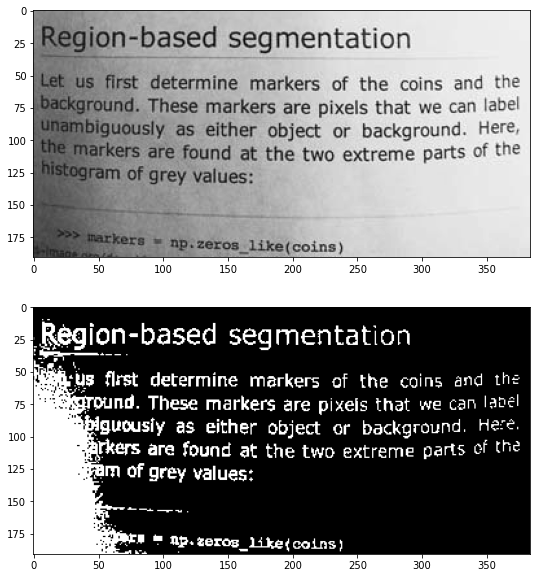

In [13]:
I2 = data.page()
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.imshow(I2,cmap='gray')
plt.subplot(212)
plt.imshow(I2<120,cmap='gray')

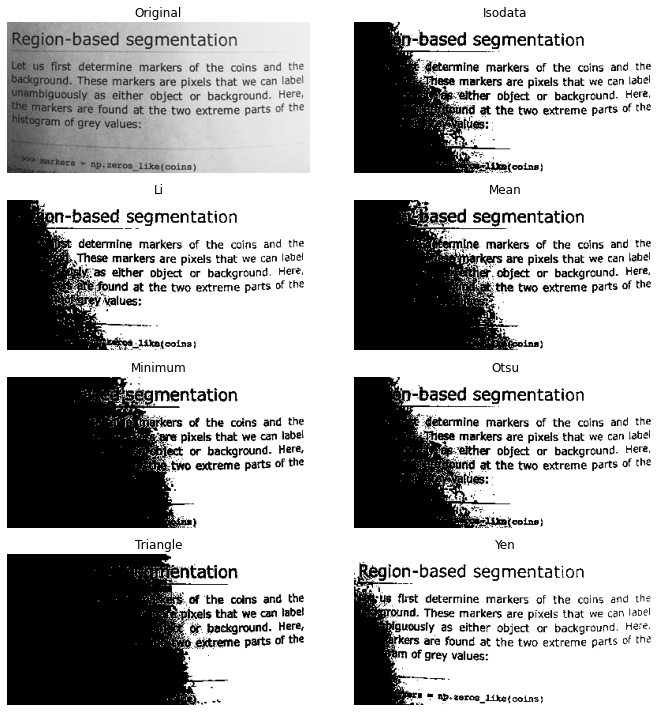

In [35]:
fig, ax = filters.try_all_threshold(I2, figsize=(10, 10), verbose=False)
plt.show()

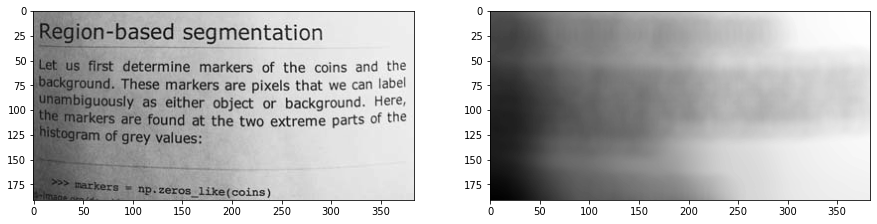

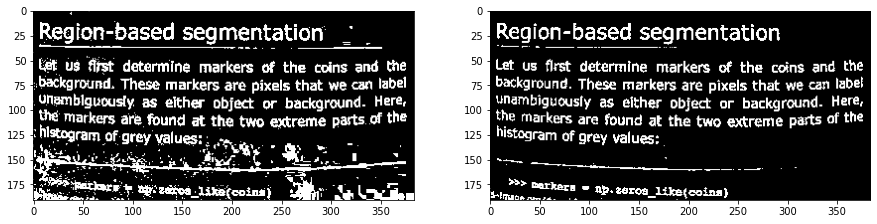

In [16]:
s_elem = disk(20)
I2_float = I2/255
I_filt  = filters.rank.mean(I2_float,selem=s_elem)/255

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(I2_float,cmap='gray')
plt.subplot(122)
plt.imshow(I_filt,cmap='gray')

im_t1 = (I2_float -I_filt) < 0.0
im_t2 = (I2_float -I_filt) < -0.05
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(im_t1,cmap='gray')
plt.subplot(122)
plt.imshow(im_t2,cmap='gray')

Text(0.5, 1.0, 'B')

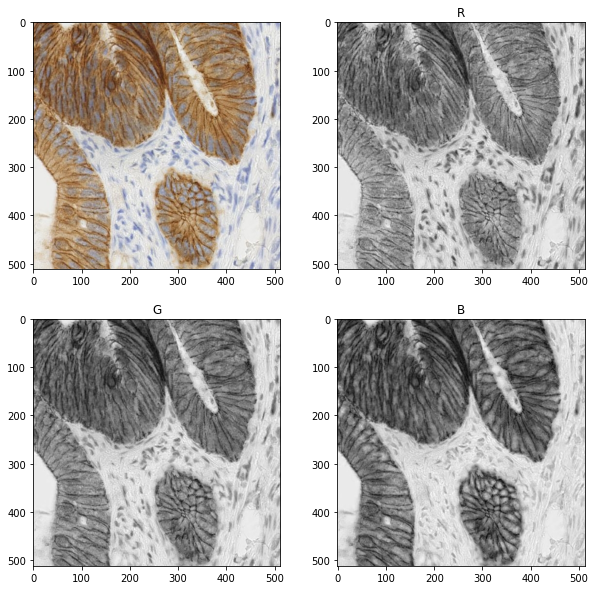

In [18]:
I3 =data.immunohistochemistry()
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(I3)
plt.subplot(222)
plt.imshow(I3[:,:,0],cmap='gray')
plt.title('R')
plt.subplot(223)
plt.imshow(I3[:,:,1],cmap='gray')
plt.title('G')
plt.subplot(224)
plt.imshow(I3[:,:,2],cmap='gray')
plt.title('B')

Text(0.5, 1.0, 'Result mask')

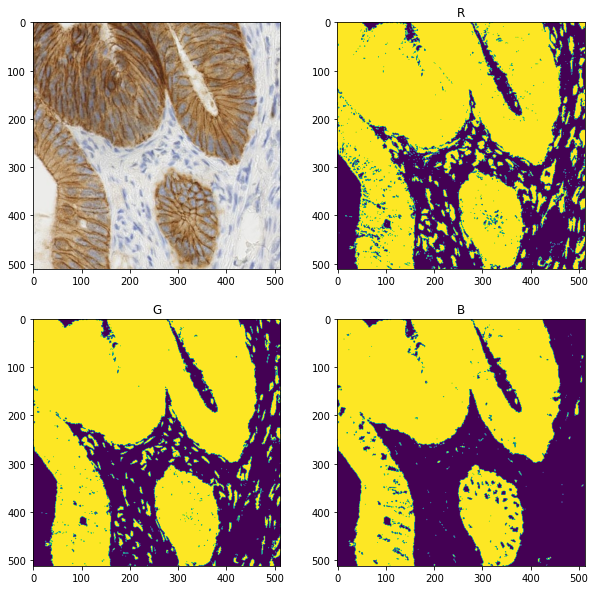

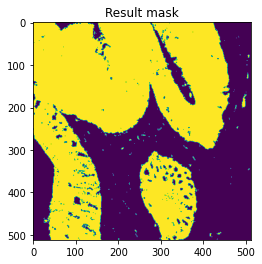

In [19]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(I3)

plt.subplot(222)
t_R =I3[:,:,0]<200
plt.imshow(t_R)
plt.title('R')

plt.subplot(223)
t_G = I3[:,:,1]<185
plt.imshow(t_G)
plt.title('G')

plt.subplot(224)
t_B = I3[:,:,2]<160
plt.imshow(t_B)
plt.title('B')

plt.figure()
mask = np.logical_and(np.logical_or(t_R,t_G),t_B)
plt.imshow(mask)
plt.title('Result mask')

Text(0.5, 1.0, 'Result mask')

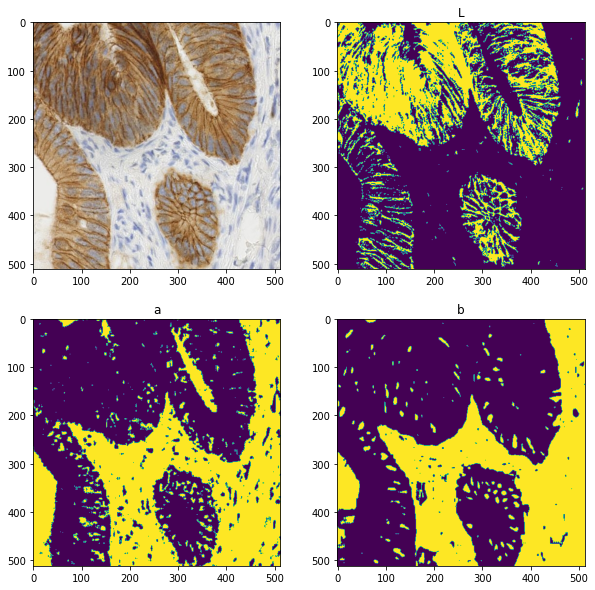

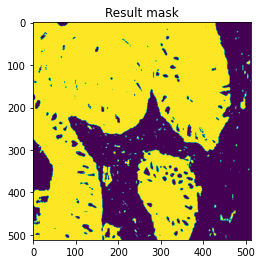

In [21]:
I3_lab = color.rgb2lab(I3)
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(I3)

plt.subplot(222)
t_L = I3_lab[:, :, 0] < 55
plt.imshow(t_L)
plt.title('L')

plt.subplot(223)
t_A = I3_lab[:, :, 1] < 3
plt.imshow(t_A)
plt.title('a')

plt.subplot(224)
t_B = I3_lab[:, :, 2] < 3.5
plt.imshow(t_B)
plt.title('b')

plt.figure()
mask = np.logical_not(np.logical_and(np.logical_not(t_L), t_B))
plt.imshow(mask)
plt.title('Result mask')

Text(0.5, 1.0, 'Grayscale Image')

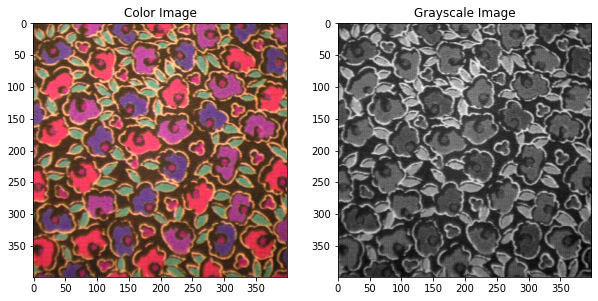

In [28]:
I = io.imread("fabric.png")
I = I[41:440, 121:520, :]

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(I)
plt.title("Color Image")

I_gray = color.rgb2gray(I)
plt.subplot(122)
plt.imshow(I_gray, cmap='gray')
plt.title("Grayscale Image")

Text(0.5, 1.0, 'Prahovaný červený kanál, dva prahy ')

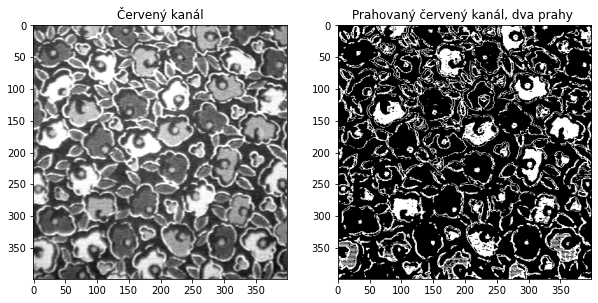

In [29]:
I_red = I[:, :, 0]

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(I_red, cmap='gray')
plt.title("Červený kanál")

I_red_t = np.logical_and(I_red > 155, I_red < 225)
plt.subplot(122)
plt.imshow(I_red_t, cmap='gray')
plt.title("Prahovaný červený kanál, dva prahy ")

Text(0.5, 1.0, 'Farebne prahovanie')

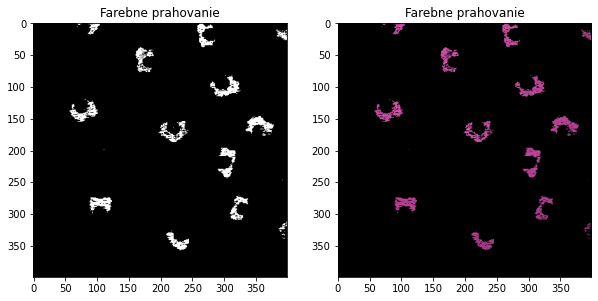

In [32]:
I_lab = color.rgb2lab(I/255)
X = np.logical_and(I_lab[:, :, 1] > 47, I_lab[:, :, 1] < 62)
Y = np.logical_and(I_lab[:, :, 2] > -33, I_lab[:, :, 2] < -15)

plt.figure(figsize=(10, 10))
plt.subplot(121)
mask = np.logical_and(X, Y)
plt.imshow(mask, cmap='gray')
plt.title('Farebne prahovanie')

plt.subplot(122)
mask = np.repeat(mask[...,None],3,axis=2)
plt.imshow(color.lab2rgb(I_lab*mask))
plt.title('Farebne prahovanie')

Text(0.5, 1.0, 'Žltá maska rgb')

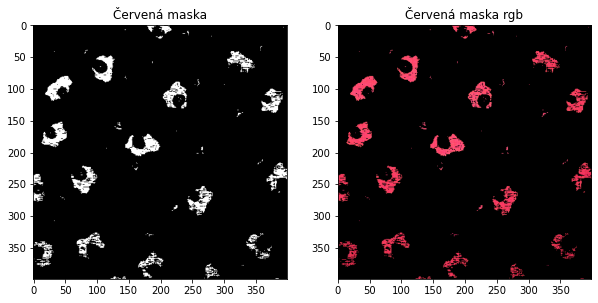

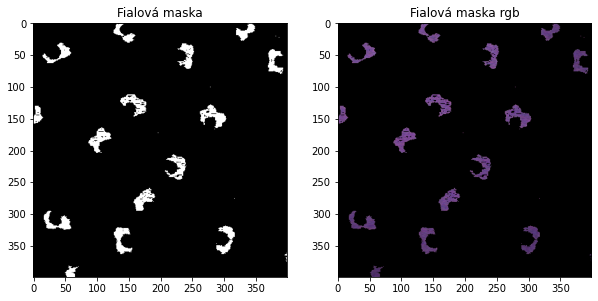

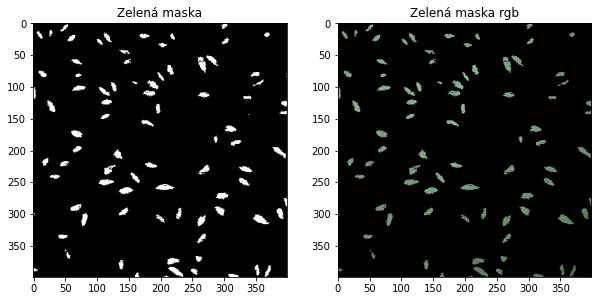

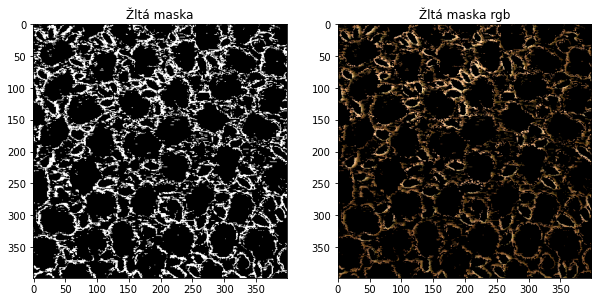

In [34]:
# Segmentujte z obrázku textílie červené, fialové, žlté a zelené objekty.

X = np.logical_and(I_lab[:, :, 1] > 58, I_lab[:, :, 1] < 80)
Y = np.logical_and(I_lab[:, :, 2] > 9, I_lab[:, :, 2] < 30)

plt.figure(figsize=(10, 10))
plt.subplot(121)
mask = np.logical_and(X, Y)
plt.imshow(mask, cmap='gray')
plt.title('Červená maska')

plt.subplot(122)
mask = np.repeat(mask[...,None],3,axis=2)
plt.imshow(color.lab2rgb(I_lab*mask))
plt.title('Červená maska rgb')


X = np.logical_and(I_lab[:, :, 1] > 20, I_lab[:, :, 1] < 42)
Y = np.logical_and(I_lab[:, :, 2] > -40, I_lab[:, :, 2] < -20)

plt.figure(figsize=(10, 10))
plt.subplot(121)
mask = np.logical_and(X, Y)
plt.imshow(mask, cmap='gray')
plt.title('Fialová maska')

plt.subplot(122)
mask = np.repeat(mask[...,None],3,axis=2)
plt.imshow(color.lab2rgb(I_lab*mask))
plt.title('Fialová maska rgb')

X = np.logical_and(I_lab[:, :, 1] > -30, I_lab[:, :, 1] < -12)
Y = np.logical_and(I_lab[:, :, 2] > 0, I_lab[:, :, 2] < 22)

plt.figure(figsize=(10, 10))
plt.subplot(121)
mask = np.logical_and(X, Y)
plt.imshow(mask, cmap='gray')
plt.title('Zelená maska')

plt.subplot(122)
mask = np.repeat(mask[...,None],3,axis=2)
plt.imshow(color.lab2rgb(I_lab*mask))
plt.title('Zelená maska rgb')

X = np.logical_and(I_lab[:, :, 1] > -2, I_lab[:, :, 1] < 20)
Y = np.logical_and(I_lab[:, :, 2] > 22, I_lab[:, :, 2] < 44)

plt.figure(figsize=(10, 10))
plt.subplot(121)
mask = np.logical_and(X, Y)
plt.imshow(mask, cmap='gray')
plt.title('Žltá maska')

plt.subplot(122)
mask = np.repeat(mask[...,None],3,axis=2)
plt.imshow(color.lab2rgb(I_lab*mask))
plt.title('Žltá maska rgb')
